# Tutorial

This tutorial demonstrates how to use LineageVI for RNA velocity analysis with gene programs.


In [110]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [111]:
import lineagevi
import scanpy as sc
import scvelo as scv
import numpy as np
import os

In [112]:
adata = scv.datasets.pancreas()

In [113]:
adata.X = adata.layers['unspliced'].copy() + adata.layers['spliced'].copy()
adata.layers['counts'] = adata.X.copy()

In [114]:
del adata.uns['neighbors']
del adata.uns['connectivities']
del adata.uns['distances']

KeyError: 'connectivities'

In [ ]:
adata

AnnData object with n_obs × n_vars = 3696 × 2000
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts'
    var: 'highly_variable_genes', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'pca', 'terms', 'log1p'
    obsm: 'X_pca', 'X_umap'
    varm: 'I', 'PCs'
    layers: 'spliced', 'unspliced', 'counts', 'Ms', 'Mu'
    obsp: 'distances', 'connectivities'

In [ ]:
annotation_path = '/Users/lgolinelli/git/lineageVI/notebooks/data/inputs/gene_sets/'
annotation_name = 'msigdb_development_or_pancreas.gmt'
file_path = os.path.join(annotation_path, annotation_name)
lineagevi.utils.add_annotations(
    adata, 
    files=[file_path],
    min_genes=12,
    varm_key='I',
    uns_key='terms',
    clean=True,
    genes_use_upper=True)

adata._inplace_subset_var(adata.varm['I'].sum(1) > 0)

In [ ]:
adata_copy = adata.copy()


In [ ]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000, subset_highly_variable=True, log=True)
sc.pp.pca(adata)
sc.pp.neighbors(adata, n_neighbors=30)
scv.pp.moments(adata)
adata.layers['Mu']


Filtered out 8545 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.


/Users/lgolinelli/miniconda3/envs/test1/lib/python3.11/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


Logarithmized X.
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


array([[0.07748552, 0.01397342, 0.93895924, ..., 0.        , 0.16416757,
        0.0782147 ],
       [0.08140523, 0.07094067, 0.50765413, ..., 1.3264576 , 0.41514748,
        0.27270272],
       [0.06220628, 0.        , 0.38394466, ..., 0.        , 0.04888206,
        0.14409344],
       ...,
       [0.03330915, 0.11889038, 0.62900424, ..., 0.78480786, 0.04716033,
        0.09891231],
       [0.11475158, 0.        , 0.7661148 , ..., 0.        , 0.24751854,
        0.15342966],
       [0.06169698, 0.        , 0.8354489 , ..., 0.        , 0.21901055,
        0.20294268]], shape=(3696, 2000), dtype=float32)

In [ ]:
scv.pp.filter_and_normalize(adata_copy, min_shared_counts=20, n_top_genes=2000, subset_highly_variable=True, log=True)
sc.pp.pca(adata_copy)
sc.pp.neighbors(adata, n_neighbors=200)
scv.pp.moments(adata_copy)
adata_copy.layers['Mu']


Filtered out 8545 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.


/Users/lgolinelli/miniconda3/envs/test1/lib/python3.11/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)
/var/folders/1x/8dphwyvs0j504xrq138nfssh0000gn/T/ipykernel_2255/3319450936.py:4: DeprecationWarning: Automatic neighbor calculation is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors first with Scanpy.
  scv.pp.moments(adata_copy)
/Users/lgolinelli/miniconda3/envs/test1/lib/python3.11/site-packages/scvelo/preprocessing/moments.py:71: DeprecationWarning: `neighbors` is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors with Scanpy.
  neighbors(


computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


array([[0.07748552, 0.01397342, 0.93895924, ..., 0.        , 0.16416757,
        0.0782147 ],
       [0.08140523, 0.07094067, 0.50765413, ..., 1.3264576 , 0.41514748,
        0.27270272],
       [0.06220628, 0.        , 0.38394466, ..., 0.        , 0.04888206,
        0.14409344],
       ...,
       [0.03330915, 0.11889038, 0.62900424, ..., 0.78480786, 0.04716033,
        0.09891231],
       [0.11475158, 0.        , 0.7661148 , ..., 0.        , 0.24751854,
        0.15342966],
       [0.06169698, 0.        , 0.8354489 , ..., 0.        , 0.21901055,
        0.20294268]], shape=(3696, 2000), dtype=float32)

In [64]:
adata_copy.X.data

array([0.77947074, 0.5624938 , 0.5624938 , ..., 0.74421847, 0.74421847,
       0.8726515 ], shape=(2308411,), dtype=float32)

In [45]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000, subset_highly_variable=True, log=True)
scv.pp.moments(adata, n_neighbors=30)

Filtered out 8545 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.


/Users/lgolinelli/miniconda3/envs/test1/lib/python3.11/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)
/var/folders/1x/8dphwyvs0j504xrq138nfssh0000gn/T/ipykernel_2255/5016908.py:2: DeprecationWarning: Automatic neighbor calculation is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors first with Scanpy.
  scv.pp.moments(adata, n_neighbors=30)
/Users/lgolinelli/miniconda3/envs/test1/lib/python3.11/site-packages/scvelo/preprocessing/moments.py:71: DeprecationWarning: `neighbors` is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors with Scanpy.
  neighbors(
/Users/lgolinelli/miniconda3/envs/test1/lib/python3.11/site-packages/scvelo/preprocessing/neighbors.py:233: DeprecationWarning: Automatic computation of PCA is de

computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


Filter out any annotations (terms) with less than 12 genes.

In [7]:
select_terms = adata.varm['I'].sum(0)>12
adata.uns['terms'] = np.array(adata.uns['terms'])[select_terms].tolist()
adata.varm['I'] = adata.varm['I'][:, select_terms]

Filter out genes not present in any retained terms after selection of HVGs.

In [8]:
adata._inplace_subset_var(adata.varm['I'].sum(1)>0)

In [9]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=20 + 1, metric='euclidean', n_jobs=-1)
nbrs.fit(adata.obsm['X_pca'])
distances, indices = nbrs.kneighbors(adata.obsm['X_pca'])

adata.uns['indices'] = indices

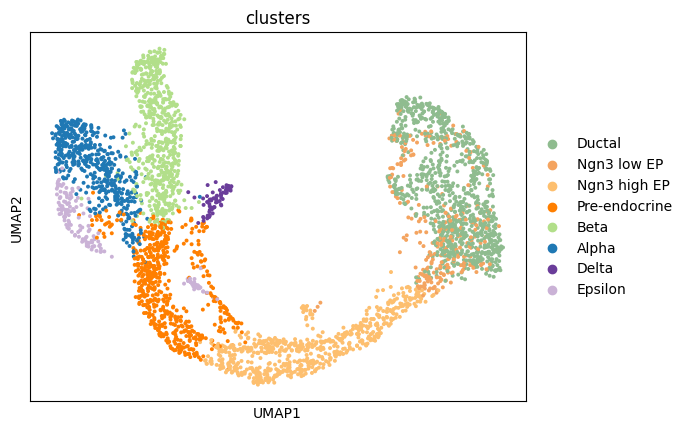

In [10]:
sc.tl.umap(adata)
sc.pl.umap(adata, color='clusters')

In [11]:
vae = lineagevi.LineageVI(
    adata=adata,
    n_hidden=128,
    mask_key='I',
    unspliced_key='Mu',
    spliced_key='Ms',
    latent_key='z',
    nn_key='indices',
)

history = vae.fit(
    K=10,
    batch_size=1024,
    lr=1e-3,
    epochs1=5,
    epochs2=5,
    seeds=(0, 1, 2),
    output_dir='/Users/lgolinelli/git/lineageVI/notebooks/data/outputs/pancreas',   # or None
    verbose=1,
    monitor_genes=['Gnas'],
    monitor_negative_velo=False
)

[Regime1] Epoch 1/5 - Loss: 31.1263
[Regime1] Epoch 2/5 - Loss: 31.0174
[Regime1] Epoch 3/5 - Loss: 30.8958
[Regime1] Epoch 4/5 - Loss: 30.7404
[Regime1] Epoch 5/5 - Loss: 30.5497
[Regime2] Epoch 1/5 - Velocity Loss: 0.5086
[Regime2] Epoch 2/5 - Velocity Loss: 0.4566
[Regime2] Epoch 3/5 - Velocity Loss: 0.4271
[Regime2] Epoch 4/5 - Velocity Loss: 0.4032
[Regime2] Epoch 5/5 - Velocity Loss: 0.3830
Saved model  → /Users/lgolinelli/git/lineageVI/notebooks/data/outputs/pancreas/vae_velocity_model.pt
Note: Call model.get_model_outputs() to annotate adata with velocities


In [12]:
vae.get_model_outputs(
    adata=adata,
    n_samples=100,
    return_mean=True,
    return_negative_velo=True,
    base_seed=0,
    save_to_adata=True,
    unspliced_key='Mu',
    spliced_key='Ms',
    latent_key='z',
    nn_key='indices'
)

computing velocity graph (using 1/10 cores)
or disable the progress bar using `show_progress_bar=False`.
    finished (0:00:05) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


/Users/lgolinelli/miniconda3/envs/test1/lib/python3.11/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lgolinelli/miniconda3/envs/test1/lib/python3.11/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lgolinelli/miniconda3/envs/test1/lib/python3.11/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lgolinelli/miniconda3/envs/test1/lib

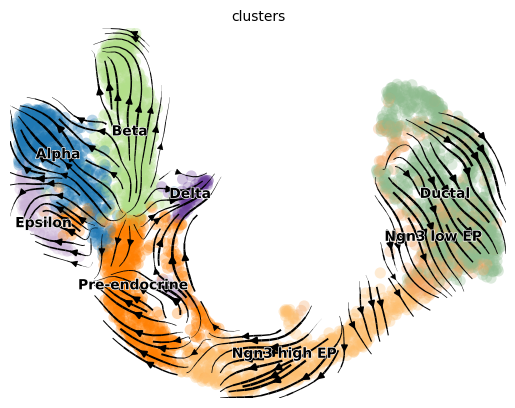

In [13]:
scv.tl.velocity_graph(adata)
scv.pl.velocity_embedding_stream(adata, color='clusters')

In [14]:
adata_gp = lineagevi.utils.build_gp_adata(adata)

computing velocity graph (using 1/10 cores)
    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


/Users/lgolinelli/miniconda3/envs/test1/lib/python3.11/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lgolinelli/miniconda3/envs/test1/lib/python3.11/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])


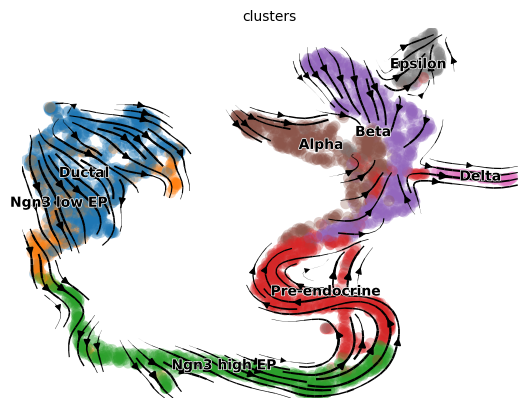

In [15]:
sc.pp.neighbors(adata_gp)
sc.tl.umap(adata_gp)
scv.tl.velocity_graph(adata_gp)
scv.pl.velocity_embedding_stream(adata_gp, color='clusters')

In [16]:
vae.map_velocities(
        adata,
        adata_gp=None,
        direction = "gp_to_gene",
        scale = 10.0,
        velocity_key = "velocity_gp2gene",
        unspliced_key = "Mu",
        spliced_key = "Ms"
)


/Users/lgolinelli/miniconda3/envs/test1/lib/python3.11/site-packages/scvelo/tools/velocity_graph.py:114: DeprecationWarning: `neighbors` is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors with Scanpy.
  neighbors(adata)
/Users/lgolinelli/miniconda3/envs/test1/lib/python3.11/site-packages/scvelo/preprocessing/neighbors.py:233: DeprecationWarning: Automatic computation of PCA is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute PCA with Scanpy first.
  _set_pca(adata=adata, n_pcs=n_pcs, use_highly_variable=use_highly_variable)


In [17]:
vae.map_velocities(
        adata,
        adata_gp=adata_gp,
        direction = "gene_to_gp",
        scale = 10.0,
        velocity_key = "velocity_gene2gp",
        unspliced_key = "Mu",
        spliced_key = "Ms"
)

In [18]:
lineagevi.plots.top_features_table(adata, groupby_key="clusters", categories=['Beta'], layer="velocity", n=10)

,feature,mean_activation,Beta mean
1,Pyy,300.539520,300.539520
2,Iapp,296.457672,296.457672
3,Malat1,86.158859,86.158859
4,Chgb,58.684399,58.684399
5,Nnat,44.243664,44.243664
6,Rbp4,40.596073,40.596073
7,Ttr,36.183578,36.183578
8,Chga,16.719757,16.719757
9,Xist,9.955500,9.955500
10,Isl1,8.126622,8.126622


In [19]:
lineagevi.plots.top_features_table(adata_gp, groupby_key="clusters", categories=["Ductal", 'Beta'], layer="velocity", n=10)

,feature,mean_activation,Ductal mean,Beta mean
1,DN-1,0.337287,0.310610,0.378635
2,AGENESIS_OF_CORPUS_CALLOSUM,-0.331797,-0.300065,-0.380979
3,LIVER_CANCER_SURVIVAL_DN,-0.288323,-0.260596,-0.331298
4,SOX9_TARGETS_IN_PROSTATE_DEVEL,-0.286649,-0.264447,-0.321061
5,DN2_VS_DN3_THYMOCYTE_FETAL_UP,-0.285263,-0.289531,-0.278646
6,WT_VS_ZFX_KO_BCELL_DN,0.285150,0.272341,0.305003
7,FETAL_KIDNEY_ERYTHROBLASTS,-0.284446,-0.269337,-0.307866
8,EARLY_THYMIC_PROGENITOR_VS_DN2-5,0.281916,0.278744,0.286831
9,UNSTIM_VS_ACD3_ACD28_STIM_NRAS,-0.281461,-0.265167,-0.306714
10,PANCREAS_DEVELOPMENT,-0.278641,-0.285712,-0.267681


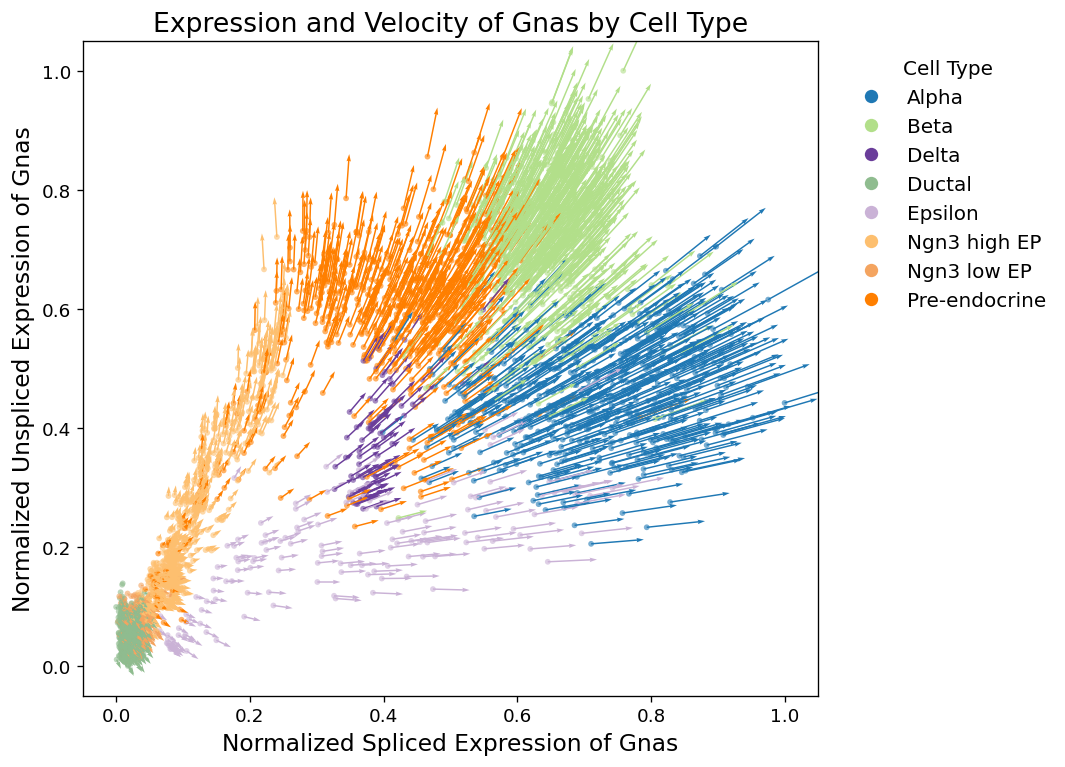

(<Figure size 1080x780 with 1 Axes>,
 <Axes: title={'center': 'Expression and Velocity of Gnas by Cell Type'}, xlabel='Normalized Spliced Expression of Gnas', ylabel='Normalized Unspliced Expression of Gnas'>)

In [20]:
lineagevi.plots.plot_phase_plane(adata, 'Gnas', u_scale=.1, s_scale=.1, alpha=1, head_width=0.02, head_length=0.03, length_includes_head=False)

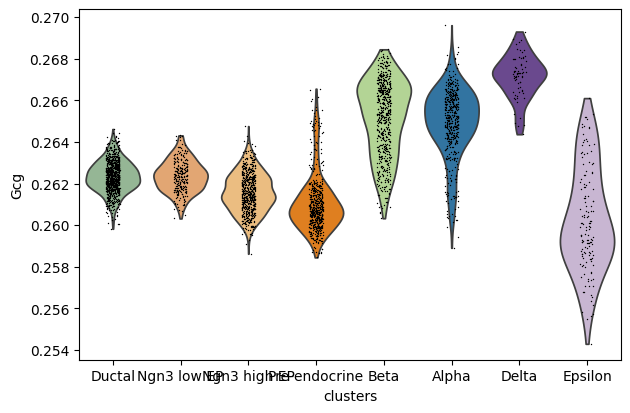

In [21]:
sc.pl.violin(adata, keys='Gcg', layer='alpha', groupby='clusters')

In [22]:
vae.model.latent_enrich(adata, groups='clusters', comparison='rest', n_sample=5000, key_added='bf_scores')

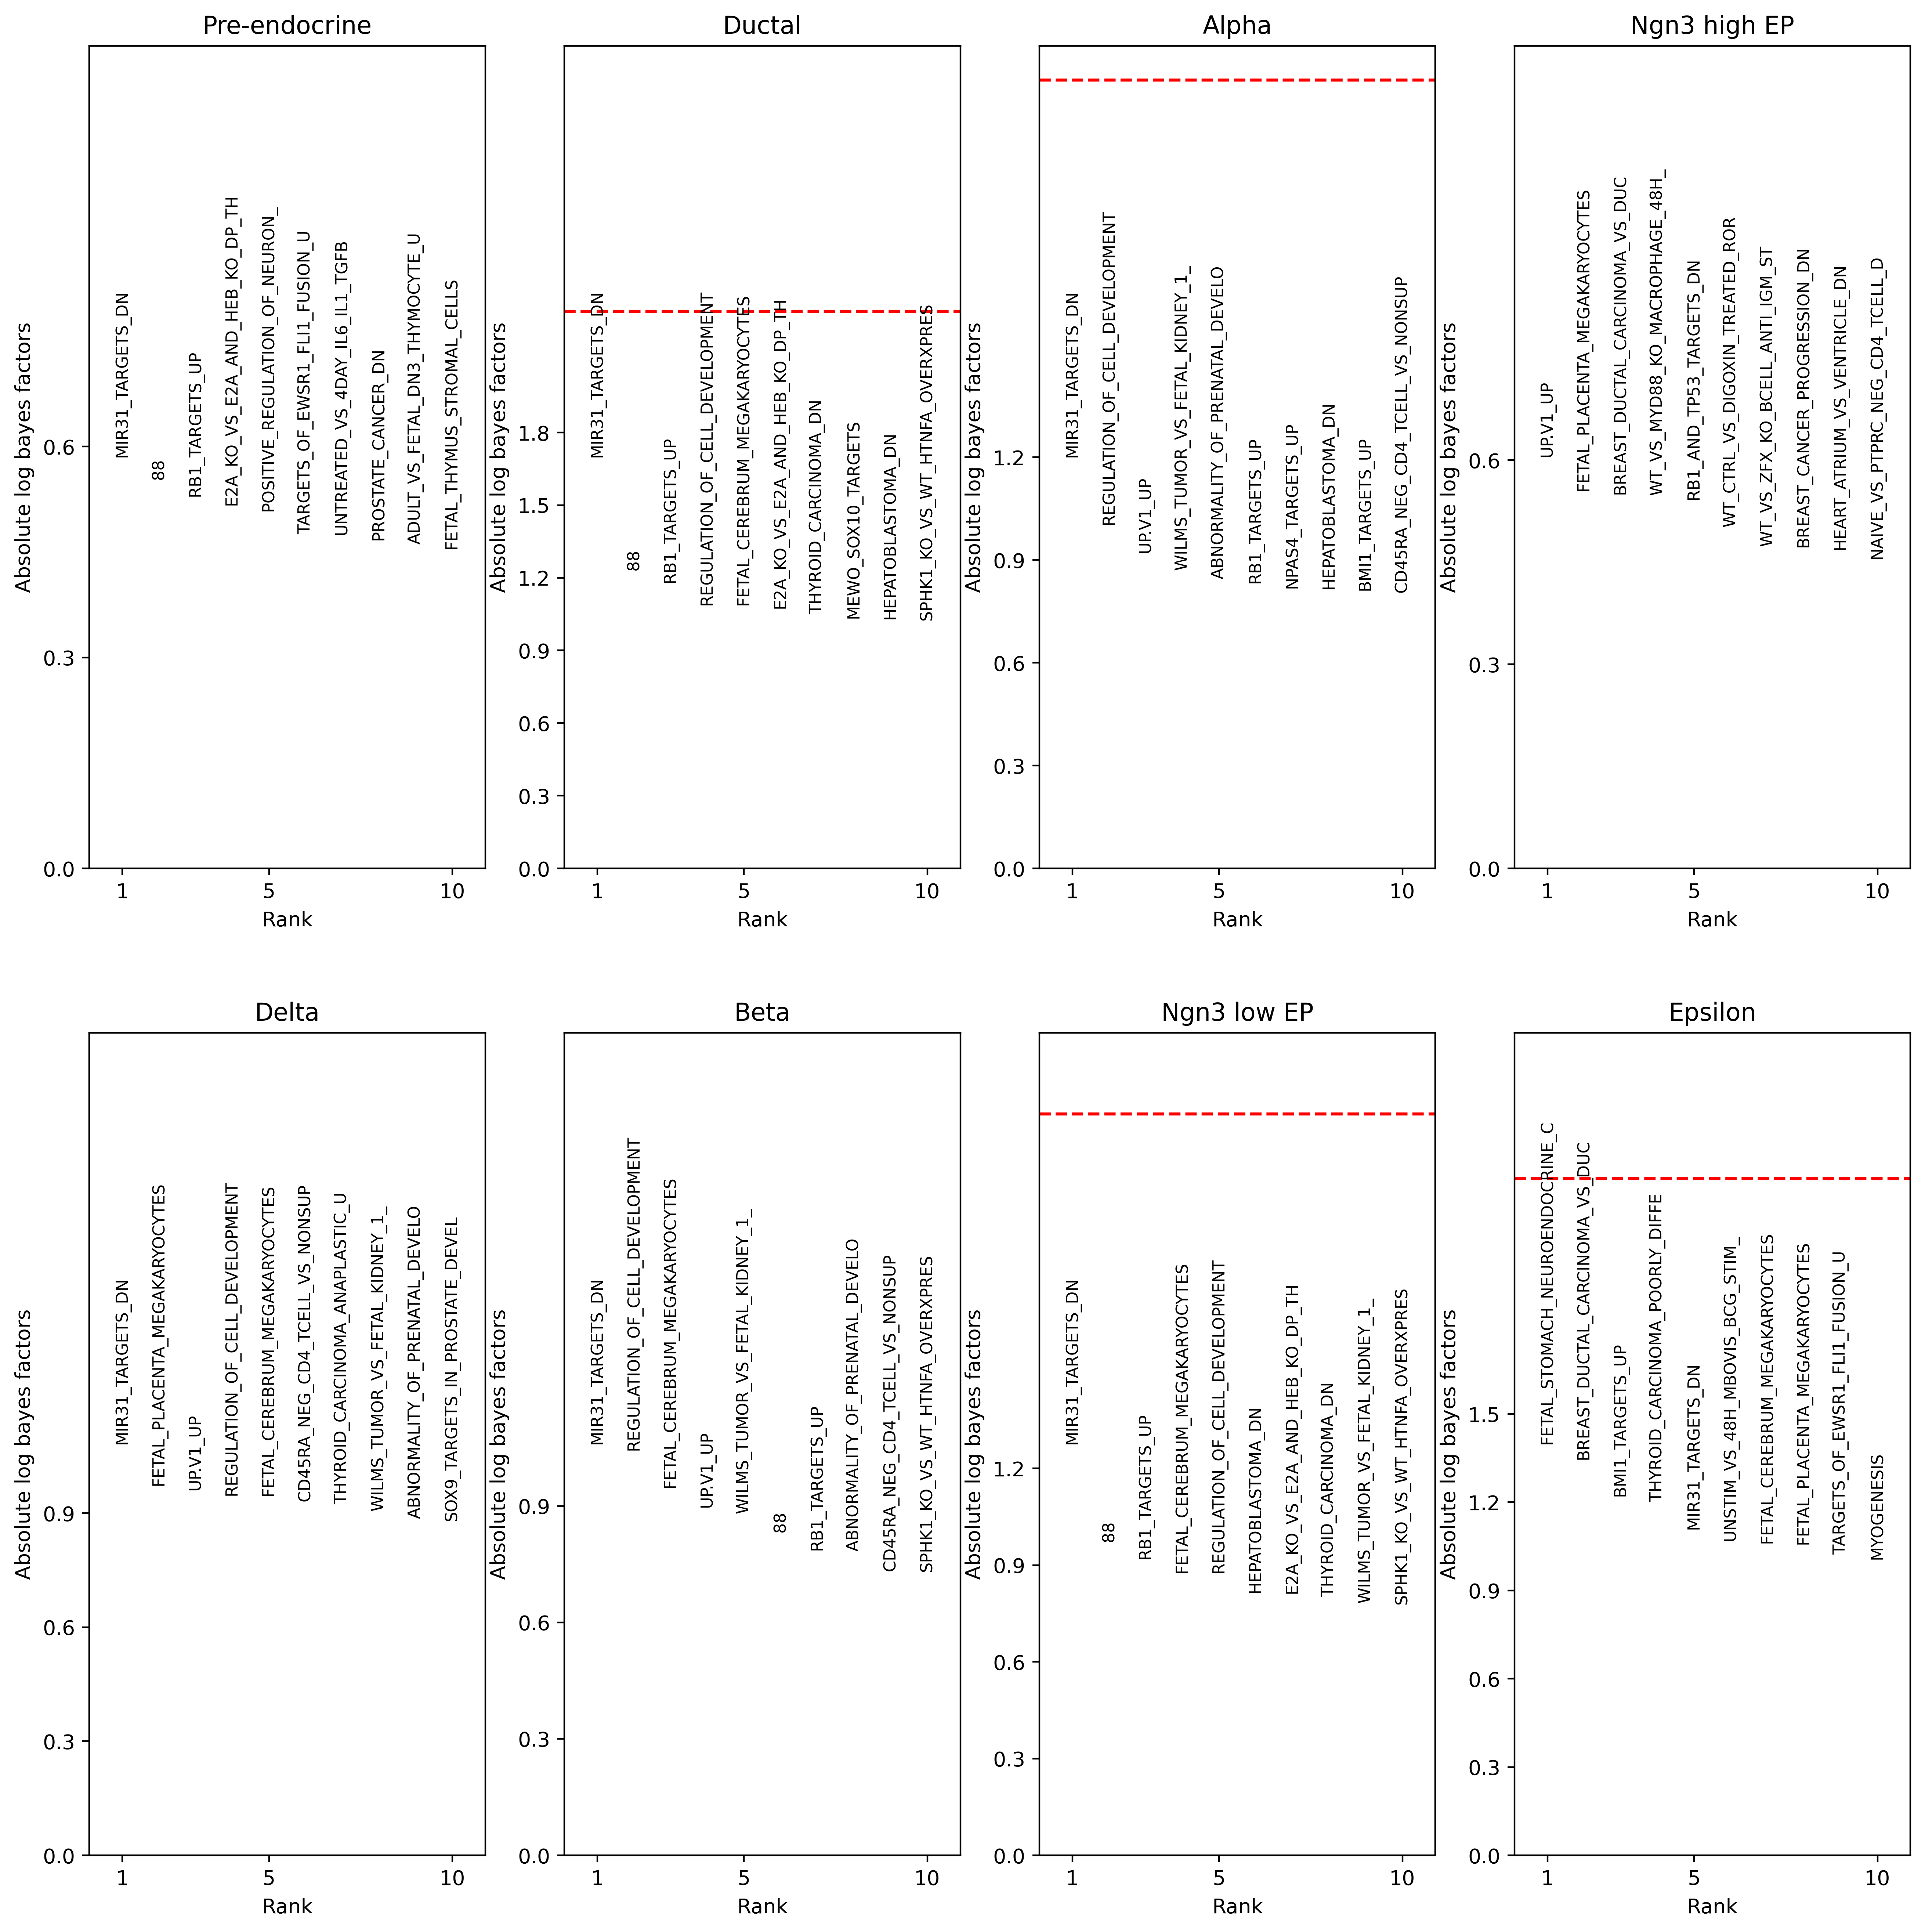

In [23]:
lineagevi.plots.plot_abs_bfs(adata, scores_key='bf_scores', n_cols=4, n_points=10, lim_val=2.3, fontsize=8, scale_y=2, yt_step=0.3,
                    title=None, figsize=None, dpi=400)

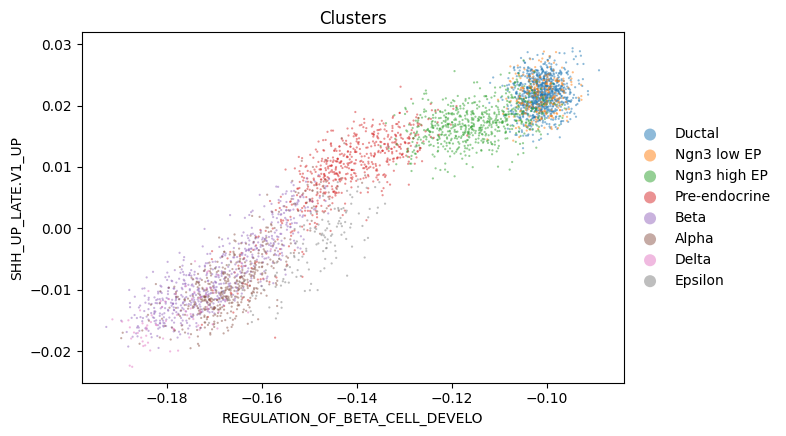

In [24]:
sc.pl.scatter(adata_gp, x='REGULATION_OF_BETA_CELL_DEVELO',y='SHH_UP_LATE.V1_UP', color='clusters', layers='velocity', size=10, alpha=0.5, title='Clusters')

In [25]:
df_genes, df_gps, perturbed_outputs = vae.perturb_genes(
                adata=adata,
                groupby_key='clusters',
                group_to_perturb='Beta',
                genes_to_perturb=['Sntg1', 'Snhg6'],
                perturb_value=0,
                perturb_spliced=True,
                perturb_unspliced=True,
            )


In [26]:
adata.obs['clusters'].value_counts()

clusters
Ductal           916
Ngn3 high EP     642
Pre-endocrine    592
Beta             591
Alpha            481
Ngn3 low EP      262
Epsilon          142
Delta             70
Name: count, dtype: int64

In [27]:
df_genes

,genes,recon_diff,abs_recon_diff,unspliced_velocity_diff,abs_unspliced_velocity_diff,velocity_diff,abs_velocity_diff,alpha_diff,abs_alpha_diff,beta_diff,abs_beta_diff,gamma_diff,abs_gamma_diff
0,Sntg1,-0.002748,0.002748,1.140497,1.140497,-1.111386,1.111386,-0.000096,0.000096,0.000767,0.000767,-0.001081,0.001081
1,Snhg6,0.004023,0.004023,0.026524,0.026524,0.116345,0.116345,0.000774,0.000774,0.001208,0.001208,-0.000503,0.000503
2,Ncoa2,0.000649,0.000649,-0.001077,0.001077,0.000328,0.000328,-0.000497,0.000497,0.000776,0.000776,0.001935,0.001935
3,Sbspon,-0.006497,0.006497,-0.000444,0.000444,-0.000005,0.000005,-0.000446,0.000446,-0.000737,0.000737,0.000335,0.000335
4,Pkhd1,-0.002254,0.002254,-0.000876,0.000876,0.000161,0.000161,-0.000703,0.000703,0.001066,0.001066,-0.000693,0.000693
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,Rbbp7,-0.000010,0.000010,-0.000782,0.000782,-0.000048,0.000048,-0.000691,0.000691,0.000739,0.000739,0.000129,0.000129
1991,Ap1s2,-0.000035,0.000035,-0.000138,0.000138,-0.000270,0.000270,0.000035,0.000035,0.000421,0.000421,0.001899,0.001899
1992,Gpm6b,0.000761,0.000761,0.000069,0.000069,-0.000007,0.000007,0.000065,0.000065,-0.000118,0.000118,0.001282,0.001282
1993,Uty,0.001494,0.001494,0.000341,0.000341,0.000018,0.000018,0.000337,0.000337,-0.000821,0.000821,0.000738,0.000738


In [28]:
df_gps

,terms,mean_diff,abs_mean_diff,logvar_diff,abs_logvar_diff,gp_velocity_diff,abs_gp_velocity_diff
0,RESPONSE_TO_LPS_WITH_MECHANICA,-0.000033,0.000033,0.000027,0.000027,-0.001214,0.001214
1,YBX1_TARGETS_DN,-0.000060,0.000060,0.000341,0.000341,-0.000078,0.000078
2,YBX1_TARGETS_UP,-0.000239,0.000239,0.000344,0.000344,0.001796,0.001796
3,CD40_SIGNALING_UP,-0.000616,0.000616,0.000477,0.000477,-0.000410,0.000410
4,CTNNB1_ONCOGENIC_SIGNATURE,0.000112,0.000112,-0.000100,0.000100,0.000173,0.000173
...,...,...,...,...,...,...,...
684,HEDGEHOG_SIGNALING_PARACRINE_D,-0.000380,0.000380,-0.000385,0.000385,-0.002481,0.002481
685,HEDGEHOG_SIGNALING_PARACRINE_U,-0.000754,0.000754,0.000150,0.000150,-0.001911,0.001911
686,MAPK8_TARGETS_DN,0.000021,0.000021,0.000677,0.000677,0.002161,0.002161
687,MAPK8_TARGETS_UP,0.001099,0.001099,-0.000082,0.000082,0.001719,0.001719


In [29]:
for key, value in perturbed_outputs.items():
    print(key)
    print('---')

recon
---
mean
---
logvar
---
velocity_gp
---
velo_u_pert
---
velo_pert
---
alpha_pert
---
beta_pert
---
gamma_pert
---


In [30]:
df_genes, df_gps, perturbed_outputs = vae.perturb_gps(
                adata=adata,
                gp_uns_key='terms',
                gps_to_perturb=['YBX1_TARGETS_DN', 'YBX1_TARGETS_UP'],
                groupby_key='clusters',
                group_to_perturb='Beta',
                perturb_value=0
            )

In [31]:
df_genes

,genes,velo_diff_u,abs_velo_diff_u,velo_diff_s,abs_velo_diff_s,x_dec_diff,x_dec_diff_abs,alpha_diff,alpha_diff_abs,beta_diff,beta_diff_abs,gamma_diff,gamma_diff_abs
0,Sntg1,0.000300,0.000300,-0.000757,0.000757,0.0,0.0,-0.000408,0.000408,-0.000499,0.000499,0.001630,0.001630
1,Snhg6,0.000056,0.000056,0.000358,0.000358,0.0,0.0,0.000071,0.000071,0.000751,0.000751,-0.001794,0.001794
2,Ncoa2,0.000595,0.000595,0.000018,0.000018,0.0,0.0,0.000938,0.000938,0.000478,0.000478,0.002028,0.002028
3,Sbspon,-0.001259,0.001259,0.000003,0.000003,0.0,0.0,-0.001255,0.001255,0.002976,0.002976,-0.000004,0.000004
4,Pkhd1,-0.002925,0.002925,0.000217,0.000217,0.0,0.0,-0.002654,0.002654,0.001281,0.001281,0.003616,0.003616
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,Rbbp7,0.001440,0.001440,0.000031,0.000031,0.0,0.0,0.001188,0.001188,-0.004183,0.004183,-0.000220,0.000220
1991,Ap1s2,-0.001277,0.001277,0.001115,0.001115,0.0,0.0,0.000267,0.000267,0.004801,0.004801,0.001730,0.001730
1992,Gpm6b,-0.000772,0.000772,0.000007,0.000007,0.0,0.0,-0.000764,0.000764,0.001819,0.001819,0.000930,0.000930
1993,Uty,-0.000997,0.000997,0.000284,0.000284,0.0,0.0,-0.000638,0.000638,0.002233,0.002233,0.002946,0.002946


In [32]:
df_gps

,gene_programs,velo_gp,abs_velo_gp
0,RESPONSE_TO_LPS_WITH_MECHANICA,0.001416,0.001416
1,YBX1_TARGETS_DN,0.002987,0.002987
2,YBX1_TARGETS_UP,-0.005525,-0.005525
3,CD40_SIGNALING_UP,0.006614,0.006614
4,CTNNB1_ONCOGENIC_SIGNATURE,-0.001806,-0.001806
...,...,...,...
684,HEDGEHOG_SIGNALING_PARACRINE_D,-0.002919,-0.002919
685,HEDGEHOG_SIGNALING_PARACRINE_U,-0.001951,-0.001951
686,MAPK8_TARGETS_DN,-0.002673,-0.002673
687,MAPK8_TARGETS_UP,-0.001536,-0.001536


In [33]:
for key, value in perturbed_outputs.items():
    print(key)
    print('---')


velocity_gp_pert
---
velo_u_pert
---
velo_pert
---
alpha_pert
---
beta_pert
---
gamma_pert
---
recon
---


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 492 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 780 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 1132 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 1548 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done 2028 tasks      | elapsed:   46.6s
[Parallel(n_jobs=-1)]: Done 2572 tasks      | elapsed:   58.5s
[Parallel(n_jobs=-1)]: Done 3180 tasks      | elapsed:  1.2min


Adding directional_variance to adata.obs
Adding directional_difference to adata.obs
Adding directional_cosine_sim_variance to adata.obs
Adding directional_cosine_sim_difference to adata.obs
Adding directional_cosine_sim_mean to adata.obs
Plotting directional_cosine_sim_variance


[Parallel(n_jobs=-1)]: Done 3696 out of 3696 | elapsed:  1.4min finished


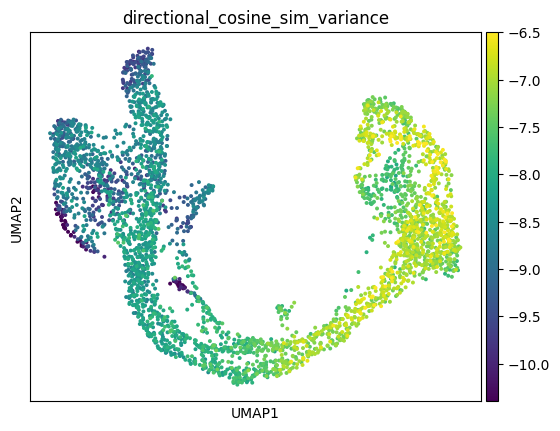

(                  directional_variance  directional_difference  \
 index                                                            
 AAACCTGAGAGGGATA              0.000026                0.014841   
 AAACCTGAGCCTTGAT              0.000112                0.034297   
 AAACCTGAGGCAATTA              0.000029                0.018015   
 AAACCTGCATCATCCC              0.000032                0.017113   
 AAACCTGGTAAGTGGC              0.000034                0.018677   
 ...                                ...                     ...   
 TTTGTCAAGTGACATA              0.000016                0.012452   
 TTTGTCAAGTGTGGCA              0.000051                0.020042   
 TTTGTCAGTTGTTTGG              0.000051                0.017444   
 TTTGTCATCGAATGCT              0.000015                0.012621   
 TTTGTCATCTGTTTGT              0.000013                0.010171   
 
                   directional_cosine_sim_variance  \
 index                                               
 AAACCTGAGAGGGATA  

In [34]:
vae.get_directional_uncertainty(
    adata,
    use_gp_velo = False,
    n_samples = 50,
    n_jobs = -1,
    show_plot =  True,
    base_seed = None,
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 516 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 964 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 1540 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 2244 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 3076 tasks      | elapsed:   33.4s


Adding directional_variance to adata.obs
Adding directional_difference to adata.obs
Adding directional_cosine_sim_variance to adata.obs
Adding directional_cosine_sim_difference to adata.obs
Adding directional_cosine_sim_mean to adata.obs
Plotting directional_cosine_sim_variance


[Parallel(n_jobs=-1)]: Done 3696 out of 3696 | elapsed:   40.3s finished


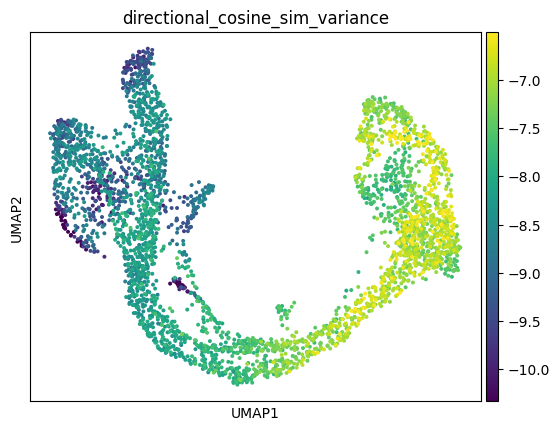

(                  directional_variance  directional_difference  \
 index                                                            
 AAACCTGAGAGGGATA              0.000028                0.016097   
 AAACCTGAGCCTTGAT              0.000133                0.034346   
 AAACCTGAGGCAATTA              0.000022                0.014683   
 AAACCTGCATCATCCC              0.000059                0.024675   
 AAACCTGGTAAGTGGC              0.000023                0.013659   
 ...                                ...                     ...   
 TTTGTCAAGTGACATA              0.000024                0.015839   
 TTTGTCAAGTGTGGCA              0.000043                0.020657   
 TTTGTCAGTTGTTTGG              0.000079                0.029270   
 TTTGTCATCGAATGCT              0.000012                0.010502   
 TTTGTCATCTGTTTGT              0.000013                0.012187   
 
                   directional_cosine_sim_variance  \
 index                                               
 AAACCTGAGAGGGATA  

In [35]:
vae.get_directional_uncertainty(
    adata,
    use_gp_velo = False,
    n_samples = 50,
    n_jobs = -1,
    show_plot =  True,
    base_seed = None,
)

/Users/lgolinelli/miniconda3/envs/test1/lib/python3.11/site-packages/scvelo/tools/velocity_graph.py:114: DeprecationWarning: `neighbors` is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors with Scanpy.
  neighbors(adata)
/Users/lgolinelli/miniconda3/envs/test1/lib/python3.11/site-packages/scvelo/preprocessing/neighbors.py:233: DeprecationWarning: Automatic computation of PCA is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute PCA with Scanpy first.
  _set_pca(adata=adata, n_pcs=n_pcs, use_highly_variable=use_highly_variable)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 516 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 964 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 1540 tasks

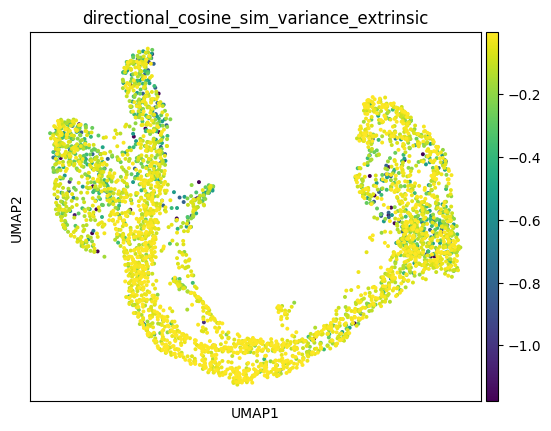

In [36]:
df = vae.compute_extrinsic_uncertainty(
    adata,
    use_gp_velo=True,
    n_samples=25, 
    n_jobs=-1,
    show_plot=True)

/Users/lgolinelli/miniconda3/envs/test1/lib/python3.11/site-packages/scvelo/tools/velocity_graph.py:114: DeprecationWarning: `neighbors` is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors with Scanpy.
  neighbors(adata)
/Users/lgolinelli/miniconda3/envs/test1/lib/python3.11/site-packages/scvelo/preprocessing/neighbors.py:233: DeprecationWarning: Automatic computation of PCA is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute PCA with Scanpy first.
  _set_pca(adata=adata, n_pcs=n_pcs, use_highly_variable=use_highly_variable)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 516 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 964 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 1540 tasks

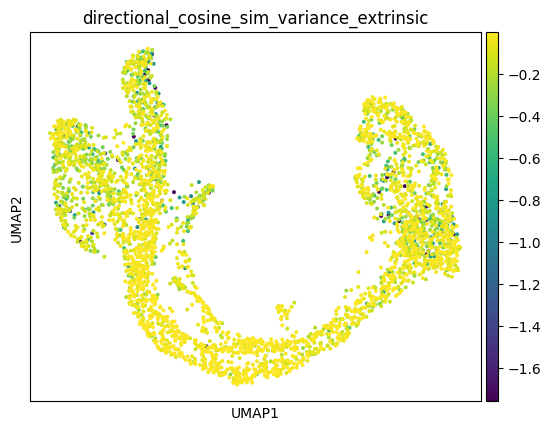

In [37]:
df = vae.compute_extrinsic_uncertainty(
    adata,
    use_gp_velo=True,
    n_samples=25, 
    n_jobs=-1,
    show_plot=True)